In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
import random
import math

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Estadísticos
# ------------------------------------------------------------------------------
from scipy import stats
import researchpy as rp
from scipy.stats import levene
# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,8)



### ASUNCIONES

In [2]:
df= pd.read_pickle("../data/outliers_gestion.pkl")

AttributeError: Can't get attribute '_unpickle_block' on <module 'pandas._libs.internals' from '/home/ctjaume/anaconda3/lib/python3.9/site-packages/pandas/_libs/internals.cpython-39-x86_64-linux-gnu.so'>

Vamos comprobar la normalidad de nuestras variables respuestas para los dos modelos.

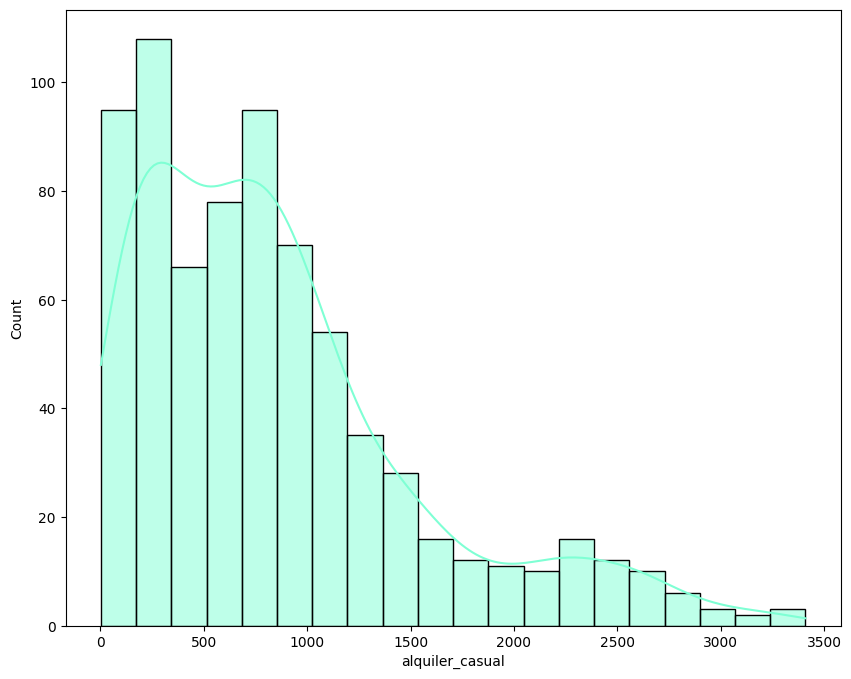

In [12]:
sns.histplot(df["alquiler_casual"], kde = True, color = "aquamarine");

Raíz-cuadrada porque tenemos sesgo a la derecha

In [ ]:
raiz_casual = df["alquiler_casual"].apply(lambda s: math.sqrt(x))

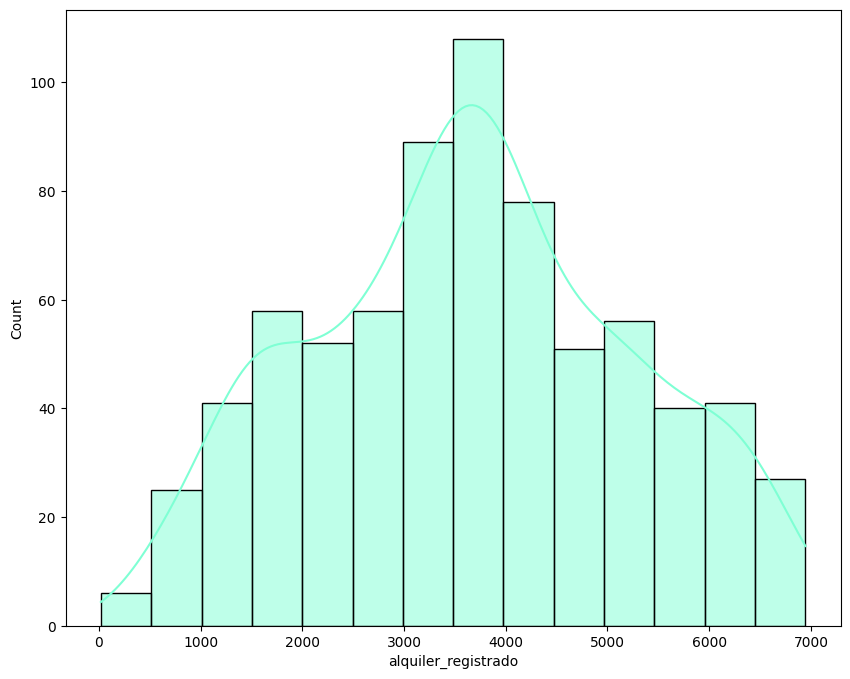

In [13]:
sns.histplot(df["alquiler_registrado"], kde = True, color = "aquamarine");

In [5]:
stats.shapiro(df["alquiler_casual"])

ShapiroResult(statistic=0.885096549987793, pvalue=7.659812252880885e-23)

In [6]:
stats.shapiro(df["alquiler_registrado"])

ShapiroResult(statistic=0.9843854308128357, pvalue=5.023125027037167e-07)

Ninguna de las dos son normales. Vamos a tratar de normalizar los valores de ambas variables.

In [ ]:
#Probamos de normalizar 'alquiler_casual' con la raiz cuadrada, ya que está muy sesgada a la izquierda

df["alquiler_casual_raiz"] = df["alquiler_casual"].apply(lambda x: math.sqrt(x))
df.head()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (15,5))
axes[0].set_title('alquiler_casual_original')
axes[1].set_title('alquiler_casual_normalizado')
sns.distplot(df["alquiler_casual"] ,ax = axes[0])
sns.distplot(df["alquiler_casual_raiz"], ax = axes[1]);

In [ ]:
#comprobamos con el shapiro si se han normalizado los datos 

stats.shapiro(df["alquiler_casual_raiz"])

In [ ]:
#probamos a normalizar la variable con box-cox

df['alquiler_casual_boxcox'], lambda_ajustada = stats.boxcox(df['alquiler_casual'])

In [ ]:
stats.shapiro(df["alquiler_casual_boxcox"])

In [ ]:
#Ahora pasamos a normalizar 'alquiler_registrado' también con box-cox

In [ ]:
df['alquiler_registrado_boxcox'], lambda_ajustada = stats.boxcox(df['alquiler_registrado'])

In [ ]:
stats.shapiro(df["alquiler_registrado_boxcox"])

CONCLUSIONES:
Hemos o no hemos podido normalizar los datos

In [ ]:
#Vamos a valorar la independencia de nuestras variables predictoras
#Primero valoramos las variables numéricas

df_num = df.select_dtypes(include = np.number)
df_num.head(2)

In [ ]:
df_cat = df.select_dtypes(exclude = np.number)